# Lecture 1

## Process vs Thread

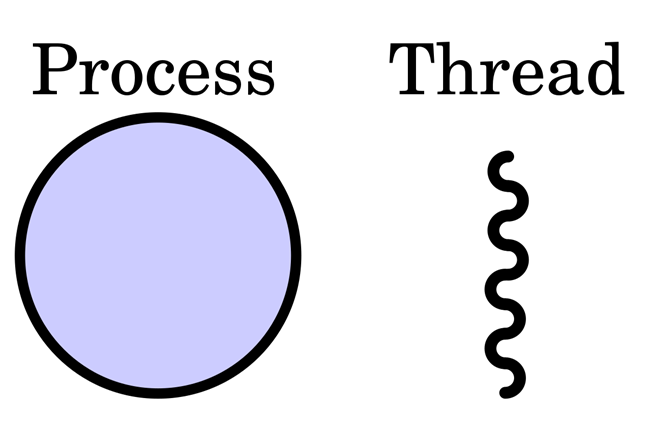

Process looks like a house, program - is a project, materials and instrumentals is data, workers is *threads*, land is *address space*.

- Main worker - **master thread**

Process is a container for the threads.

- processes are isolated from each other 
- threads can run in the same process

In every program there are some *serial* parts and *parallel parts*. We can not parallelize all code, but should think hpw to parallelise efficently.

### MultiThreading

> multi-threaded programming is only possible on shared memory systems.

## OpenMP vs MPI

**OpenMP (Open Multi-Processing)** is an application programming interface (API) that supports multi-platform shared-memory multiprocessing programming.

> We can divide tasks in different blocks.

**MPI (Message Passing Interface)** is a standardized and portable message-passing standard designed to function on parallel computing architectures - in *distributed systems*.

> One task on own peace of code on each systems. Communcitaion on submessages to performs synchronization.

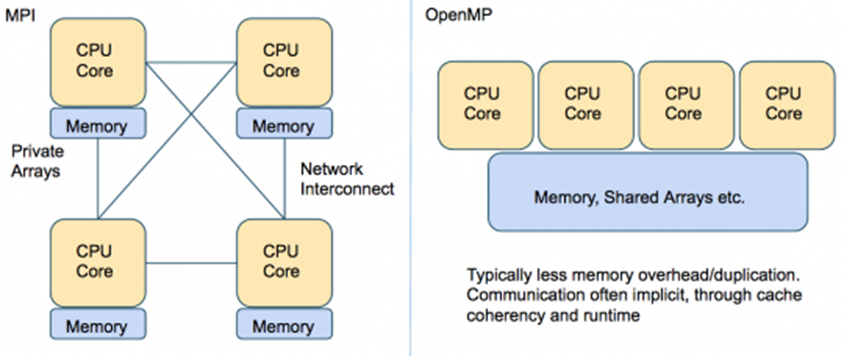

### OpenMP

OpenMP works with threads and they use **for-join** parallelism.

When program starts, *master thread* is creating - it is exists every time till the end of the program.

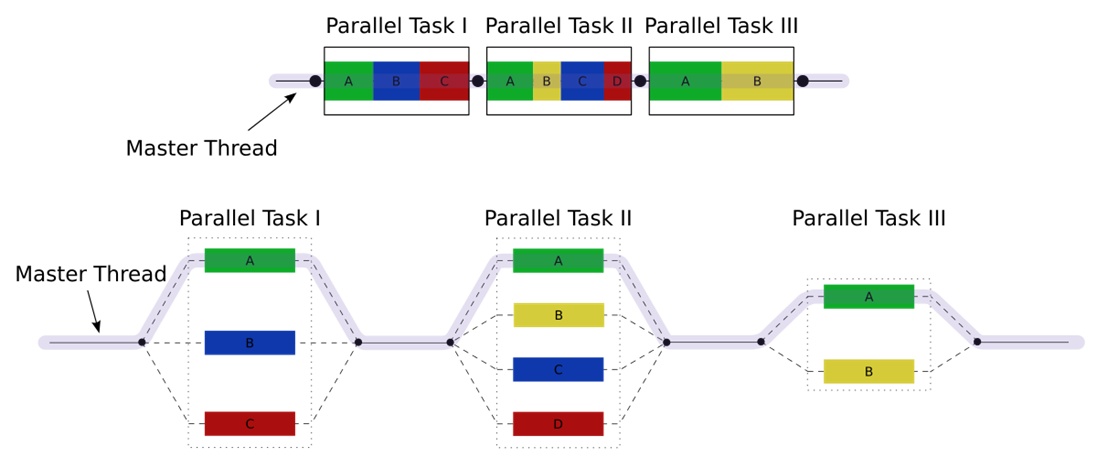

Parallel task we can divide on number of threads. We can change from parallel to serial blocks. In each time we can ask **so many threads as we need** in each time (program can have parallel and sybmol blocks).

> One version of the program for parallel and sequential execution - every worker has the same code.

> **SPMD (Single Program Multiple Data)** model of parallel programming: the same code is used for all parallel threads.

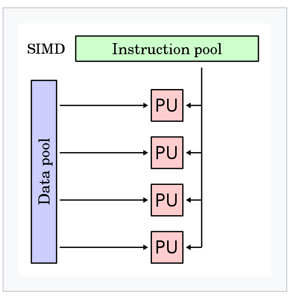

OpenMP includes:

- compiler directives
- helper function
- environment variables

**Literature**:

- Antonov. Intoduction to parallel computing.

> Basics directives embed directly into serial code

```c++
#pragma omp directive-name (clause((,) clause)...)
```

When the program starts, the main thread os master is spawned - only **the main thread** executes all sequential blocks of the program.

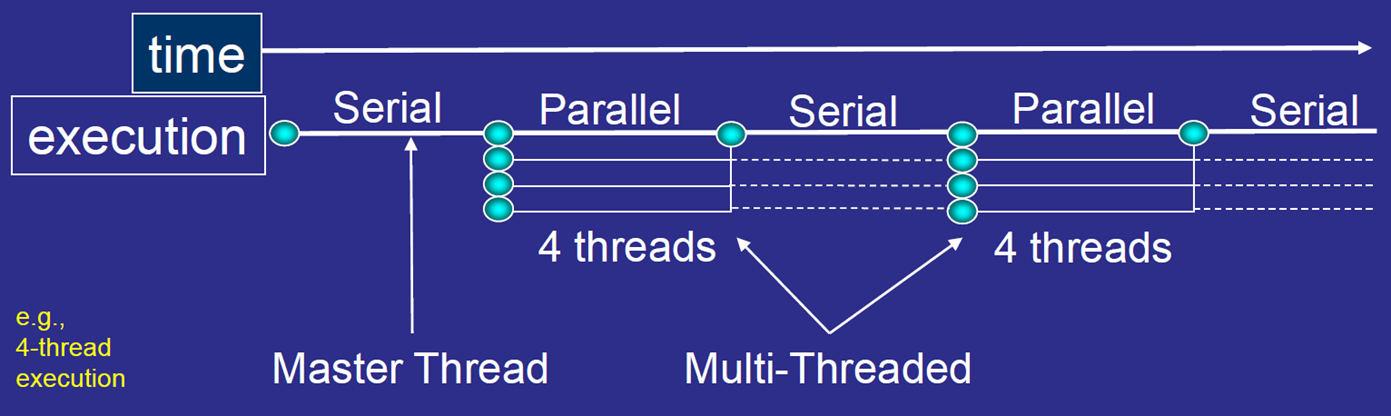

For create additional threads for parallel section you should write directive

```cpp
#pragma omp parallel (clause((), clause)…)
{
	\\ parallel code
}
```

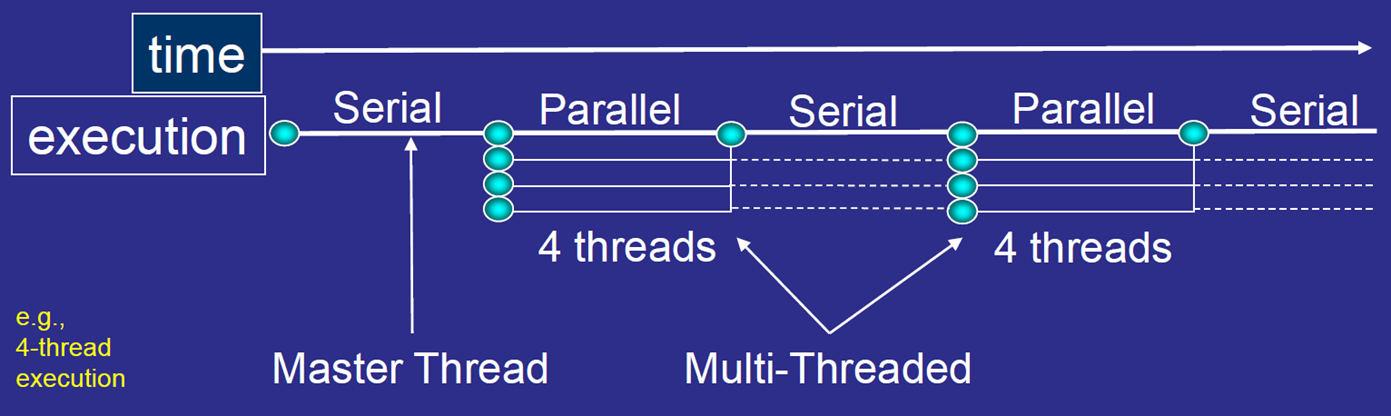

#### `1.cpp`

```cpp
For create additional threads for parallel section you should write directive

#pragma omp parallel num_threads(5)

#pragma omp parallel if (condition)
```

Many threads are creating.

```1.cpp
#include <stdio.h>

int main()
{
        printf("Serial block 1\n");
#pragma omp parallel num_threads(10)
        {
                printf("Parallel block\n"); // starting 10 threads
        }
        printf("Serial block 2\n");
}
```

We need time to create threads and send instructions, it is better to perform threads on operations which are not very simple to use.

```2.cpp
#include <iostream>
#include "omp.h"
#include <string>

using namespace std;
int main()
{
        string hw = "Hello, world\n";

#pragma omp parallel num_threads(10)
{
        cout << hw;
}
        return 0;
}
```

#### Memory model. Variable Classes in OpenMP.

Function `num_threads(30)` creates $29$ additional threads cause one thread (master) is also a thread.

```cpp
#pragma omp parallel shared(x) num_threads(30)
```

But if two threads writing into piece of memory in the same time, this addition won't happen, so the result wouldn't be $30$ (every time different).

This is **data race**.

##### Shared memory model - we can't be sure in result - there could be a data race

```cpp
#include <iostream>
#include "omp.h"
#include <string>

using namespace std;

int main()
{
        int x = 0;
#pragma omp parallel shared(x) num_threads(30)
        {
                x += 1;
        }
        cout << "x = " << x << endl;
        return 0;
}
```

> RESULT: 29, 30, 29, 30, 30 - not stable

##### Private variable

We have $n$ in sequential block. If we create private variable, for each of thread the **own n** is creating in memory piece.

```Private.cpp
#include <stdio.h>
#include <omp.h>

int main()
{
        int n = 1;

        printf("n in sequential area (start): %d\n", n);

#pragma omp parallel private(n) num_threads(4)
        {
                printf("The value of n in the thread (at the input): %d\n", n);

                n = omp_get_thread_num(); // We assign n the number of the current thread
                printf("The value of n in the thread (at the output): %d\n", n);

        }
        printf("n in sequential area (end): %d\n", n);
        return 0;
}
```

> RESULT: AT THE BEGGINGING OF TREAD - AS STARTS - 0, INSIDE THREADS - 4, OUSTIDE N - 1

#### `Firstprivate`

```cpp
#include <stdio.h>
#include <omp.h>

int main()
{
        int n = 1;

        printf("The value of n at the beginning: %d\n", n);
#pragma omp parallel firstprivate(n)
        {
                printf("The value of n in the thread (at the input): %d\n", n);
                n = n + omp_get_thread_num(); //  assign the variable n to the sequence number of the thread
                printf("The value of n in the thread (at the output): %d\n", n);
        }
        printf("The value of n at the end: %d\n", n);
}
```

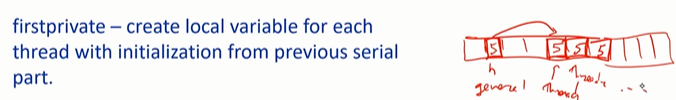

Copy variable to each thread

>> COPY VARIALBE TO EACH THREAD, THE OUPTUT INSIDE INCREASING ON 1, OUTSIDE IS STILL 1

#### `LastPrivate`

`Lastprivate` – create variable after parallel part with initialization from last parallel section

```cpp
#include <stdio.h>
#include <omp.h>

int main()
{
        int n = 1;
        int i = 0;
        int a;
        printf("The value of n at the beginning: %d\n", a);
#pragma omp parallel for private(i) lastprivate(a) num_threads(5)
        for(i=0;i<5;i++)
                {
                        a=i+1;
                        n = omp_get_thread_num(); //  assign the variable n to the sequence number of the thread
                        printf("The value of a in the thread %d\n: %d\n",a,n);
                }
printf("The value of a at the end: %d\n", a);
}
```

>> RESULT: Last one will be output as 4.

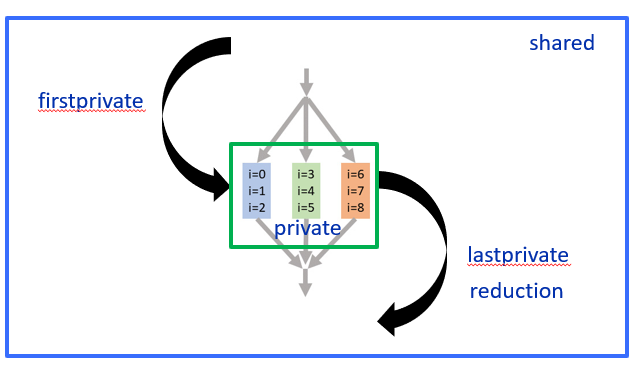

- private - inside parallel section
- firstprivate - before thread and start with each value, make copy
- lastprivate - after all threads get value

#### REDUCTION

```Reduction.cpp
#include <iostream>
#include "omp.h"
#include <string>

using namespace std;
int main()
{
        int x = 0;
#pragma omp parallel reduction(+:x) num_threads(30)
        {
                x += 1;
        }
        cout << "x = " << x << endl;
        return 0;
}
```

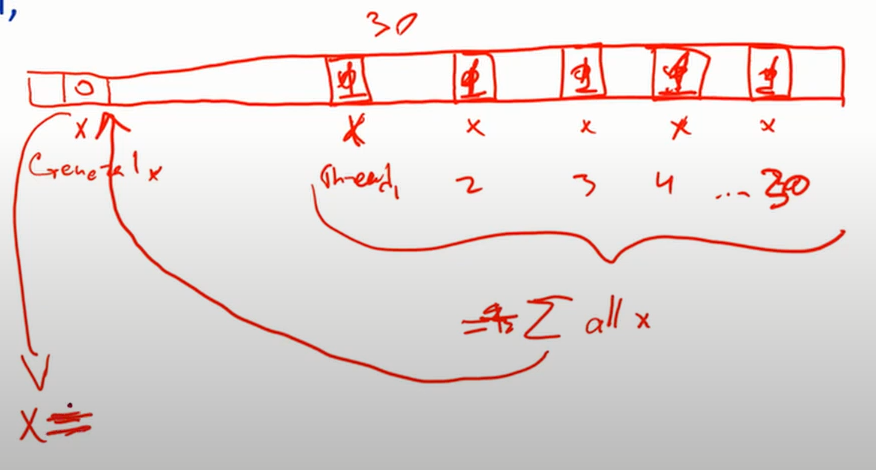

$$x + \sum\limits_{i=1}^{num\_{threads}=30} 1 = 30$$

Let'see another example:

```Reduction2.cpp
#include <iostream>
#include "omp.h"
#include <string>

using namespace std;
int main()
{
        int x = 0;
#pragma omp parallel reduction(*:x) num_threads(30)
        {
                int n = omp_get_thread_num();
                x += n;
        }
        cout << "x = " << x << endl;
        return 0;
}
```

Threads starts with 0!!

In [8]:
sum([x for x in range(0, 30)]), 30 * 29 / 2

(435, 435.0)

If we want to execute code in single thread inside multithreading, we can use:

```cpp
#pragma omp barrier
#pragme omp single copyprivate(num)
```

Master start thread, when we write `single` is it executed in single process, in the same time others threads are going further and executing.

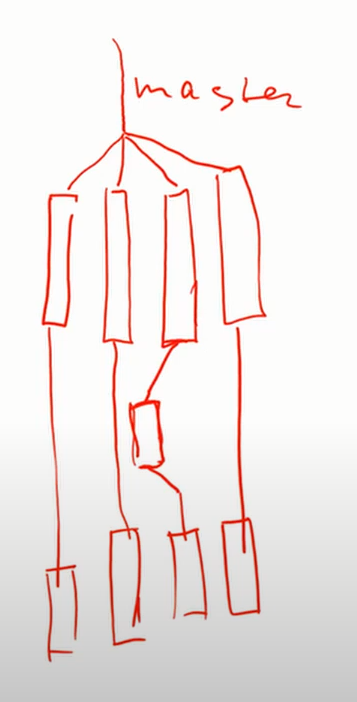

- private - local variables here
- firstprivate - adding variables inside this block of code
- `copyprivate` - waiting for single and copy the value

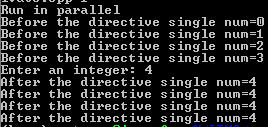

- `nowait` - don't wait

```cpp
#include <iostream>
#include <stdio.h>
#include <omp.h>
int main()
{
        double k = 0; // copy k for every thread
#pragma omp parallel num_threads(4) firstprivate(k)
        {
                printf("Before single without nowait \n");
#pragma omp single // single piece of code only buy 1 thread
                {
                        // This loop is added so that the thread can do some work.
                        for (int i = 0; i < 100000; i++)
                        {
                                k += (double)i / (i + 1);
                        }
                        printf("In single directive\n");
                }
                printf("After the single directive without nowait. This message will never be earlier than the previous ones. k = %f \n",k);

#pragma omp barrier // This directive synchronizes threads

                printf("Before single directive with nowait \n");
#pragma omp single nowait
                {
                        // his loop is added so that the thread can do some work.
                        for (int i = 0; i < 100000; i++)
                        {
                                k += (double)i / (i + 1);
                        }
                        printf("In single directive\n");
                }
                printf("After the single directive with nowait. This message may be earlier than the previous ones. k =  %f \n", k);
        }
        return 0;
}
```

### MASTER THREAD

Master thread executes only for master

```cpp
#include <stdio.h>
#include <omp.h>

int main()
{

        int n;
#pragma omp parallel private(n)
        {
                n = 1;
#pragma omp master
                {
                        n = 2;
                }
                printf("The first value of the n thread %d: %d\n", omp_get_thread_num(),n);
#pragma omp barrier
#pragma omp master
                {
                        n = 3;
                }
                printf("The second value of the n thread %d: %d\n", omp_get_thread_num(),  n);
        }
        return 0;
}
```

The first thread is master! (thread 0)

### Vectors parallel example

```Vectors.cpp
#include <iostream>
#include <omp.h>
using namespace std;
int main()
{
        const long int n = 40000000;
        double* a = new double[n];
        double* b = new double[n];
        double* c = new double[n];
        for (long int i = 0; i < n; i++)
        {
                a[i] = (double)rand() / RAND_MAX;
                b[i] = (double)rand() / RAND_MAX;
        }
        double time = omp_get_wtime();
#pragma omp parallel shared(a,b,c)
        for (long int i = 0; i < n; i++)
                {
                        c[i] = a[i] + b[i];
                }
        cout << "c[100]=" << c[100] << endl;
        cout << "Time = " << (omp_get_wtime() - time) << endl;
        delete[] a;
        delete[] b;
        delete[] c;
}
```

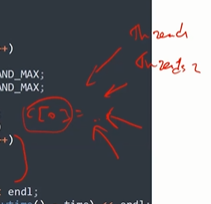

Use `omp parallel for`!!